In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
ds=pd.read_csv('Mall_Customers.csv')
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
ds.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
ds.duplicated().sum()

np.int64(0)

In [9]:
# taking input values for x

x=ds[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [16]:
# Importing Model selection library (kmeans) and fitting for prediction of clusturing

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =5,init='k-means++',random_state= 42)
y_kmeans =kmeans.fit_predict(x)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

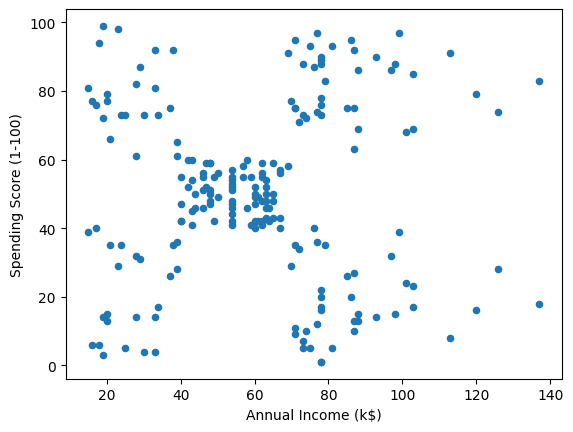

In [14]:
# plotting variable of x
# Scatter is used because to show correalation between them.
x.plot(kind = 'scatter',x = 'Annual Income (k$)',y ='Spending Score (1-100)')
plt.show()

In [19]:
# Making clusters table

result = pd.DataFrame(data=y_kmeans,columns=['Cluster'])
result

,Cluster
0,4
1,2
2,4
3,2
4,4
...,...
195,1
196,3
197,1
198,3


In [27]:
#predict for my input

kmeans.predict([[30,70]])

array([2], dtype=int32)

In [28]:
data = pd.concat([x,result],axis =1)
data

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


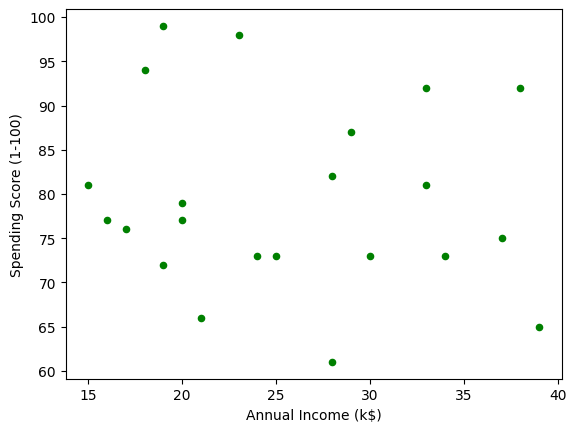

In [39]:
# Getting specific cluster list visualization
#'Cluster']==2] beacause for 2th cluster visualization
data[data['Cluster']==2].plot(kind ='scatter',x ='Annual Income (k$)',y ='Spending Score (1-100)',color ='green')
plt.show()

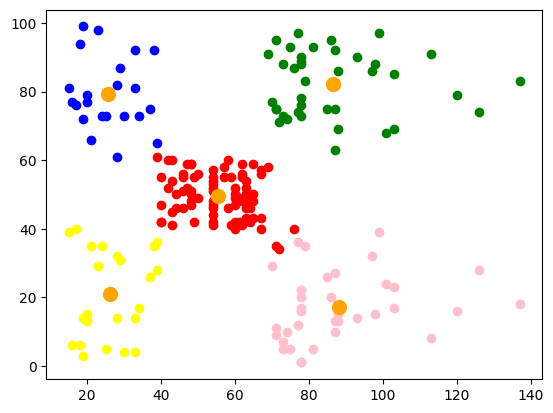

In [40]:
# Cluster vise Visualization

colors = ['red','green','blue','pink','yellow']
for i in range(0,5):
    cluster = data[data['Cluster']==i]
    plt.scatter(cluster['Annual Income (k$)'],cluster['Spending Score (1-100)'],color = colors[i])
    plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],color = 'orange',s=100)

In [50]:
# for user input

print("Enter new data to predict cluster:")

income = float(input("Enter Annual Income (k$):"))
score = float(input("Enter Spending Score (1-100):"))

#predict the cluster for new custmer
predicted_cluster = kmeans.predict([[income,score]])[0] 
print(f"The customer belongs to cluster {predicted_cluster}")

Enter new data to predict cluster:


Enter Annual Income (k$): 40
Enter Spending Score (1-100): 65


The customer belongs to cluster 2
